In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

## FedSGD attempt

In [303]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

sc=StandardScaler()
X_transform=sc.fit_transform(X)

df = pd.DataFrame(X_transform)
df["y"] = diabetes.target

In [304]:
df.head()

,0,1,2,3,4,5,6,7,8,9,y
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [4]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [5]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

     0         1         2         3         4         5         6         7  \
0  1.0  0.800500  1.065488  1.297088  0.459840 -0.929746 -0.732065 -0.912451   
1  1.0 -0.039567 -0.938537 -1.082180 -0.553511 -0.177624 -0.402886  1.564414   
2  1.0  1.793307  1.065488  0.934533 -0.119218 -0.958674 -0.718897 -0.680245   
3  1.0 -1.872441 -0.938537 -0.243771 -0.770658  0.256292  0.525397 -0.757647   
4  1.0  0.113172 -0.938537 -0.764944  0.459840  0.082726  0.327890  0.171178   

          8         9        10      y  
0 -0.054499  0.418551 -0.370989  151.0  
1 -0.830301 -1.436551 -1.938479   75.0  
2 -0.054499  0.060207 -0.545154  141.0  
3  0.721302  0.477072 -0.196823  206.0  
4 -0.054499 -0.672582 -0.980568  135.0  


Text(0, 0.5, 'Cost')

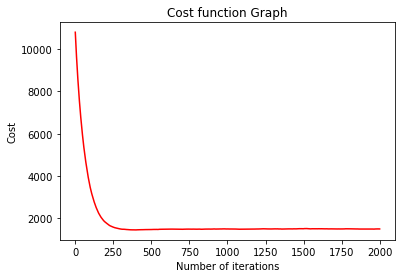

In [305]:
N = 8
S = 6
iterations = 2000
n_feat = 11
learning_rate = 0.03

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

sc=StandardScaler()
X_transform=sc.fit_transform(X)

y_new = np.reshape(y, (len(y), 1))   
cost_lst = []

vectorX = generateXvector(X_transform)
w_init = theta_init(X_transform)

df = pd.DataFrame(vectorX)
df["y"] = y

print(df.head())

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

for i in range(len(data)):
    data[i] = (data[i][range(0,11)].to_numpy(),data[i]["y"].to_numpy())


m = len(X_transform)

w_model = w_init

#Iterations
for i in range(0,iterations):

    #Random selection of clients
    x = list(range(1,N))
    sel = random.sample(x,S)

    grad = [None]*S
    loc = 0
    
    #Clients iteration
    for j in sel:

        w_cli = w_model
    
        gradients = 2/m * vectorX.T.dot(vectorX.dot(w_model) - y_new)
        grad[loc] = 2/m * data[j][0].T.dot(data[j][0].dot(w_model) - data[j][1].reshape(len(data[j][1]),1))
        loc +=1
    
    g = np.stack(grad, axis=0)
    grad_mean = g.mean(axis = 0)

    
    w_model = w_model  - learning_rate*grad_mean
    
    y_pred = vectorX.dot(w_model)
    cost_value = 1/(2*len(y))*((y_pred - y)**2) 
            #Calculate the loss for each training instance
    total = 0
    for i in range(len(y)):
        total += cost_value[i][0] 
        #Calculate the cost function for each iteration
    cost_lst.append(total)
    
    #grads = np.stack(grads)
    #mean_grads = np.average(grads, axis=0)
    #print(w_model)

    
    
plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [306]:
w_init

array([[ 1.79698202],
       [-0.8194185 ],
       [-0.32083269],
       [ 0.89572974],
       [ 0.26830843],
       [-1.88000688],
       [-0.63603857],
       [-1.07824026],
       [-1.2959321 ],
       [ 1.3247733 ],
       [ 1.64815205]])

## Toy data test

Text(0, 0.5, 'Cost')

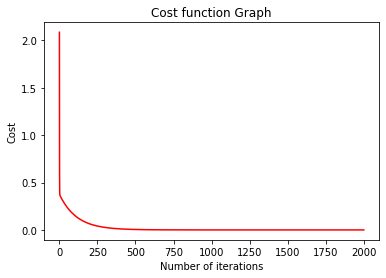

In [308]:
x = [np.random.randint(1,10) for i in range(0,300)]
y = [n*2 for n in x]
x = np.array(x).reshape(300,1)
y = np.array(y).reshape(300,1)



N = 8
S = 6
iterations = 2000

n_feat = 2
learning_rate = 0.01

y_new = np.reshape(y, (len(y), 1))   
cost_lst = []

vectorX = generateXvector(x)
w_init = theta_init(x)

df = pd.DataFrame(vectorX)
df["y"] = y

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

for i in range(len(data)):
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())


m = len(vectorX)

w_model = w_init

#Iterations
for i in range(0,iterations):

    #Random selection of clients
    a = list(range(1,N))
    sel = random.sample(a,S)

    grad = [None]*S
    loc = 0
    
    #Clients iteration
    for j in sel:
        
        w_cli = w_model

        
        gradients = 2/m * vectorX.T.dot(vectorX.dot(w_model) - y_new)
        

        grad[loc] = 2/len(data[j][0]) * data[j][0].T.dot(data[j][0].dot(w_model) - data[j][1].reshape(len(data[j][1]),1))
        
        loc +=1

    g = np.stack(grad, axis=0)
    grad_mean = g.mean(axis = 0)

    
    w_model = w_model  - learning_rate*grad_mean
    
    
    y_pred = vectorX.dot(w_model)
    cost_value = 1/(len(y))*((y_pred - y)**2) 
            #Calculate the loss for each training instance
    total = 0
    for i in range(len(y)):
        total += cost_value[i][0] 
        #Calculate the cost function for each iteration
    cost_lst.append(total)
    
    #grads = np.stack(grads)
    #mean_grads = np.average(grads, axis=0)
    #print(w_model)

    
    
plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [309]:
w_model

array([[1.75848218e-04],
       [1.99997218e+00]])

## FedAvg implementation 

In [257]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [256]:
def federated_sgd(data, iterations, N, S, n_feature, learning_rate,w_model):
    cost_lst = []
    for i in range(0,iterations):
        #Random selection of clients
        a = list(range(1,N))
        sel = random.sample(a,S)

        grad = [None]*S
        loc = 0

        #Clients iteration
        for j in sel:

            w_cli = w_model

            
            #Gone repla
            grad[loc] = 2/len(data[j][0]) * data[j][0].T.dot(data[j][0].dot(w_cli) - data[j][1].reshape(len(data[j][1]),1))

            loc +=1

        g = np.stack(grad, axis=0)
        #Plot over iterations
        grad_mean = g.mean(axis = 0)
        
        
        #Pytorch function 
        w_model = w_model  - learning_rate*grad_mean
        
        y_pred = vectorX.dot(w_model)
        cost_value = 1/(len(y))*((y_pred - y)**2) 
                #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] 
            #Calculate the cost function for each iteration
        cost_lst.append(total)
    return w_model, cost_lst


####  All clients same alpha

Text(0, 0.5, 'Cost')

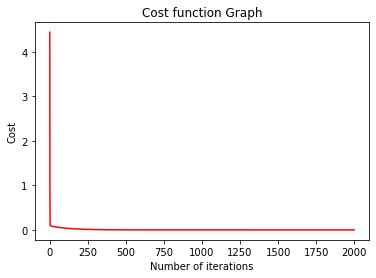

In [312]:
x = [np.random.randint(1,10) for i in range(0,300)]
y = [n*4 for n in x]
x = np.array(x).reshape(300,1)
y = np.array(y).reshape(300,1)


#Parameters of the model
N = 8
S = 6
iterations = 2000
n_feat = 2 #number of feature plus one for intercept
learning_rate = 0.01

######Data preprocessing

#Add intercept in training data 
vectorX = generateXvector(x)

df = pd.DataFrame(vectorX)
df["y"] = y

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

#Create the clients
for i in range(len(data)):
    #Normalize all instead intercept
    #data[i][1] = (data[i][1]-data[i][1].mean())/data[i][1].std()
    #data[i]["y"] = (data[i]["y"]-data[i]["y"].mean())/data[i]["y"].std()
    
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())


w_model = theta_init(x)
    
output, costs = federated_sgd(data, iterations, N, S, n_feat, learning_rate,w_model)


plt.plot(np.arange(1,iterations),costs[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [313]:
output

array([[1.41241303e-04],
       [3.99997757e+00]])

#### Two different alphas 

[[0.42626886]
 [3.44907399]]


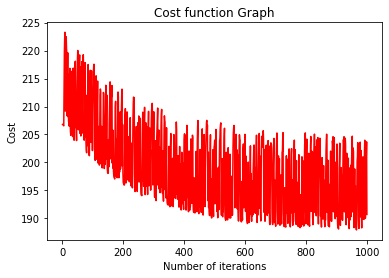

In [302]:
x_1 = [np.random.randint(1,10) for i in range(0,300)]
y_1 = [n*6 for n in x_1]
x_1 = np.array(x_1).reshape(300,1)
y_1 = np.array(y_1).reshape(300,1)

x_2= [np.random.randint(1,10) for i in range(0,300)]
y_2 = [n*2 for n in x_2]
x_2 = np.array(x_2).reshape(300,1)
y_2 = np.array(y_2).reshape(300,1)

#Parameters of the model
N = 8
S = 6
iterations = 1000
n_feat = 2 #number of feature plus one for intercept
learning_rate = 0.01

######Data preprocessing

#Add intercept in training data 
vectorX = generateXvector(x_1)
vectorX2 = generateXvector(x_2)

df = pd.DataFrame(vectorX)
df["y"] = y_1

df2 = pd.DataFrame(vectorX2)
df2["y"] = y_2

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N/2) 


shuffled2 = df2.sample(frac=1)
data2 = np.array_split(shuffled2, N/2) 

#Create the clients
for i in range(len(data)):
    #Normalize all instead intercept
    #data[i][1] = (data[i][1]-data[i][1].mean())/data[i][1].std()
    #data[i]["y"] = (data[i]["y"]-data[i]["y"].mean())/data[i]["y"].std()
    
    #Convert to numpy
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())

#Create the clients
for i in range(len(data2)):
    #Normalize all instead intercept
    #data2[i][1] = (data2[i][1]-data2[i][1].mean())/data2[i][1].std()
    #data2[i]["y"] = (data2[i]["y"]-data2[i]["y"].mean())/data2[i]["y"].std()
    
    #Convert to numpy
    data2[i] = (data2[i][range(0,n_feat)].to_numpy(),data2[i]["y"].to_numpy())

data = data + data2

w_model = theta_init(x)
    
output, costs = federated_sgd(data, iterations, N, S, n_feat, learning_rate,w_model)


plt.plot(np.arange(1,iterations),costs[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

print(output)

In [300]:
type(data[1])

tuple